<a href="https://colab.research.google.com/github/JoshRogers18/Sentimental-Analysis-Tweets/blob/main/Sentimental_Analysis_on_COVID19_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 

import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

In [ ]:
# Dataset link to text: https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv
# Tweets from 24th July to 30th August 2020
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.shape

(179108, 13)

# Keep only Username, text, and date

In [ ]:
needed_columns = ['user_name','date','text']
df = df[needed_columns]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


# Make Username column a category type with a unique ID
# Change date column to only date not date and time

In [ ]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes
df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


# Removing urls in text

In [ ]:
texts = df['text']
# texts

remove_url = lambda x:re.sub('https\S+', '', str(x))
texts_lr =texts.apply(remove_url)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

# Convert to lowercase

In [ ]:
to_lower = lambda x : x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

# Remove punctuations

In [ ]:
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))
# arguemnts state to leave everything but delete all punctuations
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104               2020 the year of insanity lol covid19 
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

# Remove Stopwords

In [ ]:
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(more_words)

# # want all of the words that are not stopwords 
remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

# Create list of words from all tweets

In [ ]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'that…',
 'hey',
 'yankees',
 'yankeespr',
 'mlb',
 'wouldnt',
 'made',
 'sense',
 'players',
 'pay',
 'respects',
 'a…',
 'diane3443',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'to…',
 'brookbanktv',
 'one',
 'gift',
 'give',
 'appreciation',
 'simple',
 'things',
 'always',
 'around',
 'me…',
 '25',
 'july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'kansalrohit69',
 'drsyedsehrish',
 'airnewsalerts',
 'ani…',
 'deaths',
 'continue',
 'rise',
 'almost',
 'bad',
 'ever',
 'politicians',
 'businesses',
 'want…',
 'change',
 'work',
 'general',
 'recruiting',
 'specifically',
 'via',
 'proactivetalent',
 'recruiting…',
 'wear',
 'face',
 'coverings',
 'shopping',
 'includes',
 'visit',
 'local',
 'community',
 'pharmacy…',
 'praying',
 'good',
 'health',
 'recovery',
 'chouhanshivraj',
 'covidpositive',
 'po

## Create a dataframe to look at top words in histogram

In [ ]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word','frq']
words_df.head()
px.bar(words_df, x= 'word',y='frq',title='Most common words')

## Put cleaned text into main dataframe

In [ ]:
df.text = texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...


In [ ]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1         {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2         {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
179104    {'neg': 0.435, 'neu': 0.235, 'pos': 0.329, 'co...
179105    {'neg': 0.25, 'neu': 0.556, 'pos': 0.194, 'com...
179106    {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [ ]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()
# shows the negativity, neutrality, positivity, and compund (overall) scores

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.832,0.168,0.2057
3,0.00,0.563,0.437,0.7351
4,0.00,0.796,0.204,0.3182


In [ ]:
# x in lambda function is representing the cell
labelize = lambda x : 'neutral' if x == 0 else('positive' if x > 0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.00,0.758,0.242,0.4939,positive
1,0.11,0.709,0.181,0.2263,positive
2,0.00,0.832,0.168,0.2057,positive
3,0.00,0.563,0.437,0.7351,positive
4,0.00,0.796,0.204,0.3182,positive


# Join previous dataframe with main

In [ ]:
data = df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positive
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive


# Plot sentiment score counts

In [ ]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,70048
1,neutral,62520
2,negative,46540


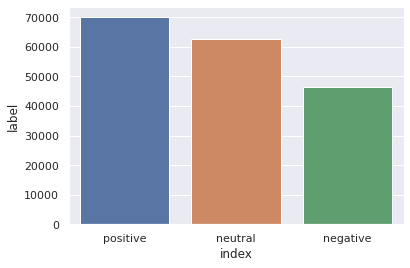

In [ ]:
sns.barplot(x='index',y='label',data=counts_df)

In [ ]:
data_agg = data[['user_name','date','label']].groupby(['date','label']).count().reset_index()
data_agg.columns = ['date','label','counts']
data_agg.head()


,date,label,counts
0,2020-07-24,negative,84
1,2020-07-24,neutral,96
2,2020-07-24,positive,115
3,2020-07-25,negative,4325
4,2020-07-25,neutral,5798


In [ ]:
px.line(data_agg, x='date',y='counts',color='label',title='Daily Tweets Sentimental Analysis')